<a href="https://colab.research.google.com/github/MarkAvilin1/DS-and-ML/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# задания 
# Анализ данных

# Ultra-pro

Возьмите базу квартир (moscow.csv). Проведите парсинг и очистку данных. Переведите все параметры в числовой формат и рассчитайте корреляцию. Напишите выводы.


## Парсинг из прошлого задания Pro

In [ ]:
from tensorflow.keras import utils 
import matplotlib.pyplot as plt 
from google.colab import files
import seaborn as sns 
import pandas as pd
import numpy as np      
import re                 

In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загружаем базу
df = pd.read_csv('/content/drive/My Drive/Базы/moscow.csv', sep=';')
df

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
1,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
3,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252531,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252532,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0,AVITO.ru,Продается студия с отделкой в новом монолитном...
252533,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252534,Ст,Волжская м.,10п,1/5 К,NaN,NaN,17.5/15.2/?,2790000.0,NaN,NaN,25.07.2019,14.0,AVITO.ru,ДАМЫ И ГОСПОДА! ВАШЕМУ ВНИМАНИЮ ПРЕДЛАГАЕТСЯ С...


**1. Убираем строки "Для заметок"**

In [ ]:
df = df[df['Комнат'] != 'Для заметок:'] # Оставляем в таблице только те строки, у которых в графе "Комант" нет записи "Для заметок"
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."
6,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0,Привлекательные,"Предлагаю 1- комн квартиру, в шаговой доступно..."
8,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0,Привлекательные,Продается хорошая 1 комнатная квартира. 1 взро...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252526,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0,AVITO.ru,Уникальнейшее предложение! 7 минуты до метро! ...
252528,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0,Яндекс,ВЫГОДНОЕ ПРЕДЛОЖЕНИЕ в пешей доступности от ме...
252530,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,NaN,12.07.2019,14.0,AVITO.ru,СТУДИЯ В МОСКВЕ ПО ДОСТУПНОЙ ЦЕНЕ ! __________...
252532,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0,AVITO.ru,Продается студия с отделкой в новом монолитном...


In [ ]:
df = df.reset_index(drop = True) # Переназначем индекс с удалением предыдущего индекса
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0,Привлекательные,"Предлагаю 1- комн квартиру, в шаговой доступно..."
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0,Привлекательные,Продается хорошая 1 комнатная квартира. 1 взро...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,NaN,12.07.2019,14.0,AVITO.ru,Уникальнейшее предложение! 7 минуты до метро! ...
126264,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,NaN,23.07.2019,14.0,Яндекс,ВЫГОДНОЕ ПРЕДЛОЖЕНИЕ в пешей доступности от ме...
126265,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,NaN,12.07.2019,14.0,AVITO.ru,СТУДИЯ В МОСКВЕ ПО ДОСТУПНОЙ ЦЕНЕ ! __________...
126266,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,NaN,22.07.2019,14.0,AVITO.ru,Продается студия с отделкой в новом монолитном...


**2. Удаляем столбцы "Примечание" и "ГРМ"**

In [ ]:
del df['ГРМ'] # Удаляем "ГРМ"

In [ ]:
del df['Примечание'] # Удаляем "Примечание"

In [ ]:
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,25.07.2019,1.0,Привлекательные
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,25.07.2019,2.0,Привлекательные
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,25.07.2019,4.0,Привлекательные
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,25.07.2019,7.0,Привлекательные
4,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,25.07.2019,11.0,Привлекательные
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,NaN,NaN,19.8/?/?,2850000.0,NaN,12.07.2019,14.0,AVITO.ru
126264,Ст,Авиамоторная м.,6п,2/8 К,NaN,С,20.4/18/?,3839990.0,NaN,23.07.2019,14.0,Яндекс
126265,Ст,Коломенская м.,15п,1/9 П,NaN,NaN,15.4/13.2/?,2900000.0,NaN,12.07.2019,14.0,AVITO.ru
126266,Ст,Алтуфьево м.,5т,4/9 М,NaN,NaN,26/10.9/7,5200000.0,NaN,22.07.2019,14.0,AVITO.ru


**3. Для столбца "Балкон" вместо Nan-значений создаем категорию "Отсутсвует"**

In [ ]:
df.loc[df['Балкон'].isna(), 'Балкон'] = 'Отсутствует'
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0,NaN,25.07.2019,1.0,Привлекательные
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,25.07.2019,2.0,Привлекательные
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,25.07.2019,4.0,Привлекательные
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,25.07.2019,7.0,Привлекательные
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0,NaN,25.07.2019,11.0,Привлекательные
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,NaN,19.8/?/?,2850000.0,NaN,12.07.2019,14.0,AVITO.ru
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4/18/?,3839990.0,NaN,23.07.2019,14.0,Яндекс
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,NaN,15.4/13.2/?,2900000.0,NaN,12.07.2019,14.0,AVITO.ru
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,NaN,26/10.9/7,5200000.0,NaN,22.07.2019,14.0,AVITO.ru


**4. Значения столбца "Бонус агенту" переводим в тысячи рублей, остальный значения заполняем нулями**

In [ ]:
df.loc[df['Бонус агенту'].isna(), 'Бонус агенту'] = 0 # Зададим значение 0 для Nan-значений

In [ ]:
bonus = df['Бонус агенту'] # Возьмем столбец "Бонус агенту"
cost = df['Цена, руб.']    # Возьмем столбец 'Цена, руб.'

In [ ]:
pd.options.mode.chained_assignment = None # Отключаем warnings

for i in range(bonus.shape[0]): # Пройдем по всем значениям столбца "Бонус агенту"

  if isinstance(bonus[i], str) and bonus[i].find('руб.') != -1: # Если значение является строкой (не 0, где раньше был Nan) и в
                                                                # нем есть подстрока 'руб.', значит в столбце явно указана сумма ганорара 
    bonus[i] = bonus[i][:bonus[i].find('руб.')] # Оставляем только численное значение ганорара 
    bonus[i] = bonus[i].replace(' ', '') # Удаляем пробелы,
    bonus[i] = float(bonus[i])           # Переводим в float
    bonus[i] = bonus[i] / 1000           # Делим на 1000

  elif isinstance(bonus[i], str) and bonus[i].find('%') != -1: # Если значение является строкой (не 0, где раньше был Nan) и в
                                                               # нем есть подстрока '%', значит в столбце ганорар указан в процентах от сделки
    bonus[i] = bonus[i][:bonus[i].find('%')] # Оставляем только процентное значение ганорара 
    bonus[i] = bonus[i].replace(' ', '')     # Удаляем пробелы,
    bonus[i] = float(bonus[i])               # Переводим в float
    bonus[i] = bonus[i] / 100                # Делим на 100 (так как это проценты)
    bonus[i] = bonus[i] * cost[i]            # Умножаем на значение сделки
    bonus[i] = bonus[i] / 1000               # Делим на 1000
    
df['Бонус агенту'] = bonus # Сформированный массив присваиваем к столбцу
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0,0,25.07.2019,1.0,Привлекательные
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,0,25.07.2019,2.0,Привлекательные
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,0,25.07.2019,4.0,Привлекательные
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,0,25.07.2019,7.0,Привлекательные
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0,0,25.07.2019,11.0,Привлекательные
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,NaN,19.8/?/?,2850000.0,0,12.07.2019,14.0,AVITO.ru
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4/18/?,3839990.0,0,23.07.2019,14.0,Яндекс
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,NaN,15.4/13.2/?,2900000.0,0,12.07.2019,14.0,AVITO.ru
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,NaN,26/10.9/7,5200000.0,0,22.07.2019,14.0,AVITO.ru


In [ ]:
df.rename(columns={'Бонус агенту': 'Бонус агенту, тыс. руб.'}, inplace=True) # Даем новое название столбцу
df #Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1/23/20,19500000.0,0,25.07.2019,1.0,Привлекательные
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,0,25.07.2019,2.0,Привлекательные
2,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,0,25.07.2019,4.0,Привлекательные
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,0,25.07.2019,7.0,Привлекательные
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34/17/8,6250000.0,0,25.07.2019,11.0,Привлекательные
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,NaN,19.8/?/?,2850000.0,0,12.07.2019,14.0,AVITO.ru
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4/18/?,3839990.0,0,23.07.2019,14.0,Яндекс
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,NaN,15.4/13.2/?,2900000.0,0,12.07.2019,14.0,AVITO.ru
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,NaN,26/10.9/7,5200000.0,0,22.07.2019,14.0,AVITO.ru


In [ ]:
df.loc[df['Бонус агенту, тыс. руб.'] != 0, 'Бонус агенту, тыс. руб.'] # Посмотрим на ненулевые значения

152          10
304          10
319          10
388          50
456        70.5
          ...  
124244       20
124510        5
124753    10.15
125287      150
125843       50
Name: Бонус агенту, тыс. руб., Length: 1252, dtype: object

**5. Считаем в цикле суммарную площадь помещений**

In [ ]:
# Функция получения суммарной площади числа. На вход передаем строку столбца "Площадь". 
# В этом столбце попадаются записи, не соответсвующие формату, например, в некоторых ячейках имеется дата, хотя это столбец "Площадь"
# Суммарное значение площади может быть неизвестно. В этом случае будем вносить в таблицу 0

def parcer(strg):
  result = 0               # Создаем возвращаемую переменную и приравниваем к 0
  if strg.find('/') != -1: # Если в строке есть '/'
    strg = strg[:strg.find('/')]        # Берем все, что находится до него
    search=re.compile(r'[0-9.]').search # Создаем элемент для поиска недопустимых символов 
    if bool(search(strg)): # Проверяем наличие недопустимых символов. Если есть, то coorectSymbols = False, иначе True 
      result = float(strg) # Преобразуем в float

  return result # Возвращаем результат 

areas = df['Площадь']                 # Берем все записи в столбце "Площадь" 
finalAreas = []                       # Создаем новый список, в который будем добавлять площади
for i in range(areas.shape[0]):       # Проходим по всем строчкам столбца
  finalAreas.append(parcer(areas[i])) # Добавляем в список значение площади

df['Площадь'] = finalAreas # Меняем значения площадей помещений
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500000.0,0,25.07.2019,1.0,Привлекательные
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800000.0,0,25.07.2019,2.0,Привлекательные
2,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990000.0,0,25.07.2019,4.0,Привлекательные
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200000.0,0,25.07.2019,7.0,Привлекательные
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250000.0,0,25.07.2019,11.0,Привлекательные
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,NaN,19.8,2850000.0,0,12.07.2019,14.0,AVITO.ru
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4,3839990.0,0,23.07.2019,14.0,Яндекс
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,NaN,15.4,2900000.0,0,12.07.2019,14.0,AVITO.ru
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,NaN,26.0,5200000.0,0,22.07.2019,14.0,AVITO.ru


**6. Отсутствующие значения в столбце "Санузел" меняем на "Нет данных"**

In [ ]:
df.loc[df['Санузел'].isna(), 'Санузел'] = 'Нет данных'
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500000.0,0,25.07.2019,1.0,Привлекательные
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800000.0,0,25.07.2019,2.0,Привлекательные
2,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990000.0,0,25.07.2019,4.0,Привлекательные
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200000.0,0,25.07.2019,7.0,Привлекательные
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250000.0,0,25.07.2019,11.0,Привлекательные
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,Нет данных,19.8,2850000.0,0,12.07.2019,14.0,AVITO.ru
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4,3839990.0,0,23.07.2019,14.0,Яндекс
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,Нет данных,15.4,2900000.0,0,12.07.2019,14.0,AVITO.ru
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,Нет данных,26.0,5200000.0,0,22.07.2019,14.0,AVITO.ru


**7. Переводим значение столбца 'Цена, руб.' В тысячи**

In [ ]:
df['Цена, руб.'] = df['Цена, руб.'] / 1000

In [ ]:
df.rename(columns={'Цена, руб.': 'Цена, тыс. руб.'}, inplace=True) # Даем новое название столбцу
df # Смотрим результат

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, тыс. руб.","Бонус агенту, тыс. руб.",Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500.00,0,25.07.2019,1.0,Привлекательные
1,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800.00,0,25.07.2019,2.0,Привлекательные
2,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990.00,0,25.07.2019,4.0,Привлекательные
3,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200.00,0,25.07.2019,7.0,Привлекательные
4,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250.00,0,25.07.2019,11.0,Привлекательные
...,...,...,...,...,...,...,...,...,...,...,...,...
126263,Ст,Некрасовка м.,4п,2/17 П,Отсутствует,Нет данных,19.8,2850.00,0,12.07.2019,14.0,AVITO.ru
126264,Ст,Авиамоторная м.,6п,2/8 К,Отсутствует,С,20.4,3839.99,0,23.07.2019,14.0,Яндекс
126265,Ст,Коломенская м.,15п,1/9 П,Отсутствует,Нет данных,15.4,2900.00,0,12.07.2019,14.0,AVITO.ru
126266,Ст,Алтуфьево м.,5т,4/9 М,Отсутствует,Нет данных,26.0,5200.00,0,22.07.2019,14.0,AVITO.ru


## Приводим данные к категориальным

In [ ]:
# Меняем значение Ст на 1
df['Комнат'][df['Комнат']=='Ст'] = 1

# Оставим только числовые значения
df = df[pd.to_numeric(df['Комнат'], errors='coerce').notnull()]

# Переводим все в int
df['Комнат'] = df['Комнат'].astype(float)
df['Комнат'] = df['Комнат'].astype(int)

In [ ]:
# Количество комнат превращаем в классы
def getParameterRoom(arg):
  out = int(arg)
  outClass = 0 # Индекс по умолчанию
  if (out == 1):
    outClass = 1
  if (out == 2):
    outClass = 2
  if (out == 3):
    outClass = 3
  if (out == 4):
    outClass = 4
  if (out == 5):
    outClass = 5
  if (out > 5):
    outClass = 6
  if (out > 10):
    outClass = 7

  # На выходе получаем вектор с нужной категорией комнат
  return list(utils.to_categorical(outClass, 8).astype('int'))

# Данные от станции
def getParameterStation(arg):
  arg = str(arg)
  out = 0 
  if 'п' in arg:          
    out = 1
  elif 'т' in arg: 
    out = 2
  return list(utils.to_categorical(out, 3).astype('int'))

# Категориальные Балкон
def getParameterBalcon(arg):
  outClass = 0    # по умолчанию 0
  if (arg == 'Л'):   # если лоджия
    outClass = 1
  if (arg == 'Б'):   # если 1 балкон
    outClass = 2
  if (arg == '2Л'):  # если 2 лоджии
    outClass = 3
  if (arg == '2Б'):  # если 2 балкона
    outClass = 4
  if (arg == '3Л'):  # если 3 лоджии
    outClass = 5
  if (arg == '3Б'):  # если 3 балкона
    outClass = 6
  if (arg == '2Б2Л'): # если 2 балкона и 2 лоджии
    outClass = 7
  if (arg == '4Л'): # если 4 лоджии
    outClass = 8
  if (arg == 'Б2Л'): # если балкон и 2 лоджии
    outClass = 9 
  if (arg == 'Эрк'): # если эрк
    outClass = 10
  
  return list(utils.to_categorical(outClass, 11).astype('int'))

# Данные о Санузлах
def getParameterWC(arg):
  out = str(arg)
  outClass = 0    # по умолчанию 0
  if (out == 'С') or (out == '1'):   # если лоджия
    outClass = 1
  if (out == 'Р') or (out == '+'):   # если 1
    outClass = 2
  if (out == '2С') or (out == '2'):  # если 2 санузла
    outClass = 3
  if (out == '2Р'):  # если 2 раздельных
    outClass = 4
  if (out == '3С') or (out == '3'):  # если 3 санузла
    outClass = 5
  if (out == '3Р'):  # если 2 лоджии
    outClass = 6
  if (out == '4С') or (out == '4'):  # если 4 совмест
    outClass = 7
  if (out == '4Р'):  # если 2 раздел
    outClass = 8
  return list(utils.to_categorical(outClass, 9).astype('int'))

# Данные о Площади
def getParameterArea(arg):
  arg = float(arg)
  out = 0 
  if (arg < 25):          
    out = 1
  elif (arg < 50): 
    out = 2
  elif (arg < 75):
    out = 3
  elif (arg < 100):
    out = 4
  elif (arg > 100):
    out = 5

  return list(utils.to_categorical(out, 6).astype('int'))

# Данные о Цене
def getParameterPrice(arg):
  out = float(arg/1000) 
  outClass = 0
  if (out < 5):          
    outClass = 1
  elif (out < 10):          
    outClass = 2
  elif (out < 15):          
    outClass = 3
  elif (out < 20):          
    outClass = 4
  elif (out < 25):          
    outClass = 5
  elif (out >= 25):          
    outClass = 6
  return list(utils.to_categorical(outClass, 7).astype('int'))

# Данные Бонус агенту
def getParameterBonus(arg):
  out = float(arg) 
  outClass = 0
  if (out < 10):          
    outClass = 1
  elif (out < 20):          
    outClass = 2
  elif (out < 30):          
    outClass = 3
  elif (out < 40):          
    outClass = 4
  elif (out < 50):          
    outClass = 5
  elif (out >= 50):          
    outClass = 6
  return list(utils.to_categorical(outClass, 7).astype('int'))

In [ ]:
metro = df['Метро / ЖД станции'].unique()
len(metro)

268

In [ ]:
# Данные о Метро
def getParameterMetro(arg):
  outClass = 0
  for i,j in enumerate(metro):
    if (str(j) == str(arg)):
      outClass = int(i)
  return list(utils.to_categorical(outClass, 268).astype('int'))

In [ ]:
df['Дом'].value_counts(20)

1/5 К        0.008123
1/9 П        0.007131
3/5 К        0.006253
4/5 К        0.006091
2/5 К        0.005985
               ...   
20/40 М-К    0.000008
34/43 ?      0.000008
54/85 ?      0.000008
47/84 П      0.000008
11/65 М      0.000008
Name: Дом, Length: 5146, dtype: float64

In [ ]:
# Данные о доме в категориальные
def getParameterHouse(arg):
  outClass = 0
  if 'М' in arg:
    outClass = 1
  if 'П' in arg:
    outClass = 2
  if 'К' in arg:
    outClass = 3
  if 'М-K' in arg:
    outClass = 4
  
  return list(utils.to_categorical(outClass, 5).astype('int'))

In [ ]:
# Извлекаем все параметры
def getAllParameters(val):
  room = getParameterRoom(val[0])          # Комнат
  station = getParameterStation(val[2])    # От станции
  balcon = getParameterBalcon(val[4])      # Балкон
  wc = getParameterWC(val[5])              # Санузел
  area = getParameterArea(val[6])          # Площадь
  price = getParameterPrice(val[7])        # Цена
  bonus = getParameterBonus(val[8])        # Бонус агенту
  metro = getParameterMetro(val[1])        # Метро
  house = getParameterHouse(val[3])        # Дом
  out = [] 
  
# Склеиваем все параметры в вектор  
  out += room
  out += station
  out += balcon
  out += wc
  out += area
  out += price
  out += bonus
  out += metro
  out += house
  
  return out

def get01Data(values):
  vals = [] # Здесь будем хранить кодированные значения
  
  for val in values:
    x = getAllParameters(val)
    vals.append(x)
  
  vals = np.array(vals)
  return vals

In [ ]:
vals = get01Data(df.values) # .values - значения базы, извлекаем их

In [ ]:
vals

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [ ]:
# Каждый признак закодирован. Извлечем для каждого значения таблицы максимальный индекс диапазона - это будет наше закодированное значение
# Например, комнат [0 0 1 0 0 0 0 0], argmax(комнат) = 2

categorical = pd.DataFrame(
    {'Комнат': [np.argmax(i) for i in vals[:,0:8]],                                                                
     'От станции':[np.argmax(i) for i in vals[:,8:11]],
     'Балкон':[np.argmax(i) for i in vals[:,11:22]],
     'Санузел':[np.argmax(i) for i in vals[:,22:31]],
     'Площадь':[np.argmax(i) for i in vals[:,31:37]],
     'Цена':[np.argmax(i) for i in vals[:,37:44]],
     'Бонус агенту':[np.argmax(i) for i in vals[:,44:51]],
     'Метро':[np.argmax(i) for i in vals[:,51:318]],
     'Дом':[np.argmax(i) for i in vals[:,318:323]]})


categorical.head(30) # Основные статистические данные по базе

,Комнат,От станции,Балкон,Санузел,Площадь,Цена,Бонус агенту,Метро,Дом
0,1,1,0,3,3,4,1,0,2
1,1,2,1,2,2,1,1,1,3
2,1,2,2,1,2,2,1,2,3
3,1,1,2,2,2,3,1,3,1
4,1,1,0,1,2,2,1,4,3
5,1,1,0,0,2,3,1,0,4
6,1,1,1,2,2,2,1,5,3
7,1,1,2,1,2,2,1,6,4
8,1,1,4,0,2,2,1,7,3
9,1,1,0,0,2,2,1,8,4


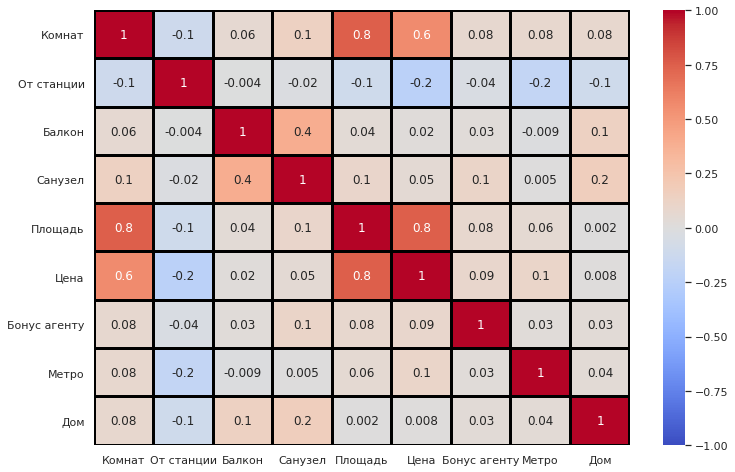

In [ ]:
# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

sns.set(style='whitegrid', palette='muted')  # Включаем режим seaborn. Теперь даже методы от matplotlib будут отображаться в этом стиле. 
                                             # whitegrid - белая сетка
                                             # muted - палитра для отображения

# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = categorical.corr('spearman') 

# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')  
plt.show()